Importing libraries

In [197]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Writing paths and variables

In [198]:
data_path = "Botola_Forecasting/"
data_type = "morocco-botola-pro-matches"
data_years = [2017,2018,2019,2020]
# data_years = [2020]

Merging years of data

In [199]:
data_selected = []
for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_type in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            data_selected.append(df)

Concatenate and explore data over years

In [200]:
data = pd.concat(data_selected)
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1472234400,Aug 26 2016 - 6:00pm,complete,NaN,Hassania Agadir,FAR Rabat,NaN,0.0,0.0,1.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade d'Agadir
1,1472313600,Aug 27 2016 - 4:00pm,complete,NaN,Olympic Safi,Chabab Rif Hoceima,NaN,0.0,0.0,1.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade El Massira
2,1472320800,Aug 27 2016 - 6:00pm,complete,NaN,Chabab Atlas Khénifra,Kasba Tadla,NaN,0.0,0.0,1.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Municipal (Khénifra)
3,1472328900,Aug 27 2016 - 8:15pm,complete,NaN,Ittihad Tanger,Difaâ El Jadida,NaN,0.0,0.0,1.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grand Stade de Tanger
4,1472400000,Aug 28 2016 - 4:00pm,complete,NaN,Raja Casablanca,KAC Kénitra,NaN,0.0,0.0,2.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mohamed V


Different teams that played in the selected years

In [201]:
teams = data.away_team_name.unique()
for team in teams:
    print("-> ",team)

->  FAR Rabat
->  Chabab Rif Hoceima
->  Kasba Tadla
->  Difaâ El Jadida
->  KAC Kénitra
->  Moghreb Tétouan
->  Ittihad Tanger
->  Hassania Agadir
->  Khouribga
->  Olympic Safi
->  Raja Casablanca
->  Kawkab Marrakech
->  RSB Berkane
->  Wydad Casablanca
->  Chabab Atlas Khénifra
->  FUS Rabat
->  Rapide Oued Zem
->  Racing de Casablanca
->  Mouloudia Oujda
->  Youssoufia Berrechid
->  CR Khemis Zemamra
->  Raja Beni Mellal


Team with most home wins

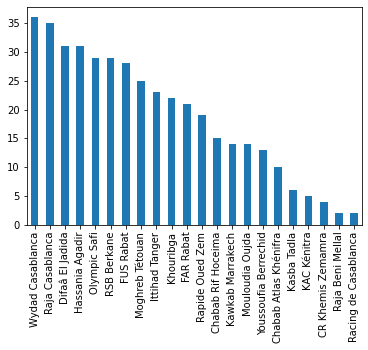

In [202]:
data[ (data.home_team_goal_count > data.away_team_goal_count) ].home_team_name.value_counts().plot.bar()

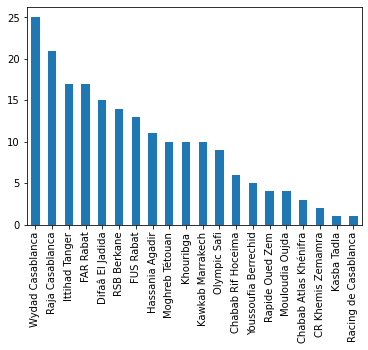

In [203]:
data[ (data.home_team_goal_count < data.away_team_goal_count) ].away_team_name.value_counts().plot.bar()

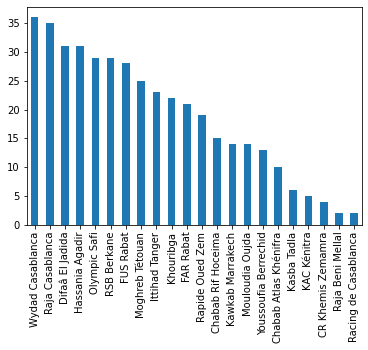

In [204]:
data[ (data.home_team_goal_count > data.away_team_goal_count) ].home_team_name.value_counts().plot.bar()



In [205]:
def result(row):
    if row.home_team_goal_count > row.away_team_goal_count:
        return 1
    elif row.home_team_goal_count < row.away_team_goal_count:
        return 2
    else:
        return 0

data['result'] = data.apply(result,axis=1)

In [206]:
new_columns = ['home_team_name','away_team_name','Pre-Match PPG (Home)','Pre-Match PPG (Away)','btts_percentage_pre_match','odds_ft_home_team_win','odds_ft_draw','odds_ft_away_team_win','result']

data = data[new_columns]

for column in new_columns:
    print("-> ",column)

->  home_team_name
->  away_team_name
->  Pre-Match PPG (Home)
->  Pre-Match PPG (Away)
->  btts_percentage_pre_match
->  odds_ft_home_team_win
->  odds_ft_draw
->  odds_ft_away_team_win
->  result


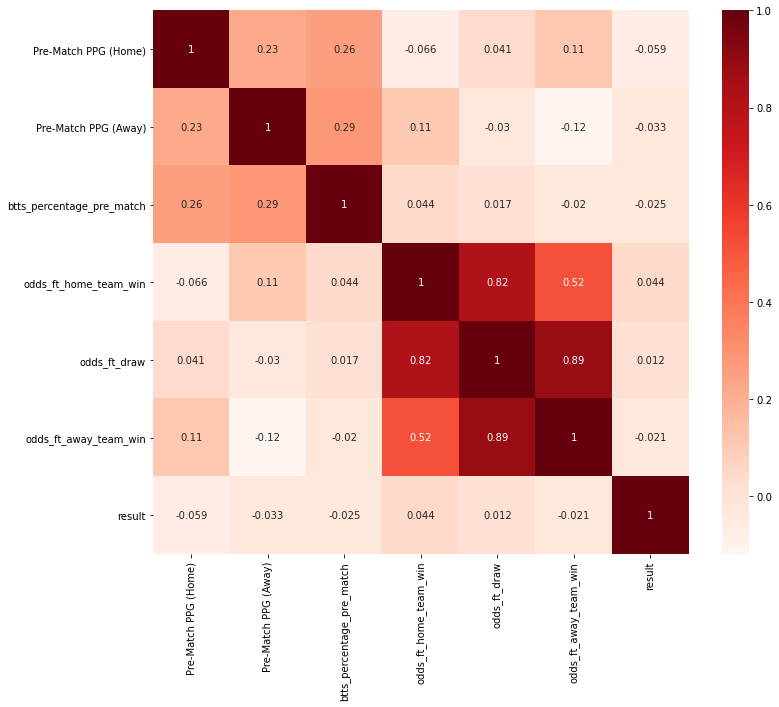

In [207]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<BarContainer object of 6 artists>

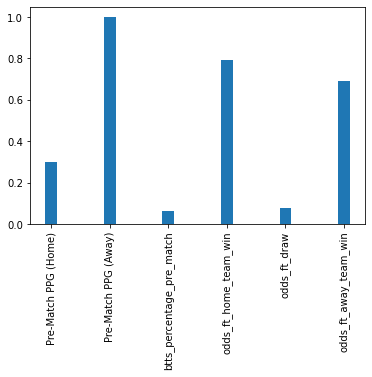

In [213]:
from sklearn.feature_selection import chi2,SelectKBest, f_classif

selector = SelectKBest(f_classif, k= len(data.columns)-3)

X = data.iloc[:,2:-1]
y = data.result
selector.fit(X, y)

scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.xticks(rotation=90)
plt.bar(X.columns, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')


In [214]:
# Univariate selection

bestfeatures = SelectKBest(score_func=chi2, k= len(data.columns)-3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

Specs      Score
5      odds_ft_away_team_win  17.264253
3      odds_ft_home_team_win  10.002442
2  btts_percentage_pre_match   6.194738
1       Pre-Match PPG (Away)   4.588569
0       Pre-Match PPG (Home)   1.128715
4               odds_ft_draw   1.043171


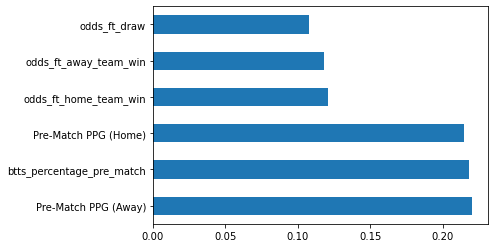

In [210]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()